
📊 Model Comparison Results:

               Model  Accuracy  Precision  Recall  F1-Score
0      Random Forest     0.980      1.000   0.929     0.963
1  Gradient Boosting     0.940      0.867   0.929     0.897
2   SVM (RBF Kernel)     0.960      1.000   0.857     0.923
3                KNN     0.966      1.000   0.878     0.935


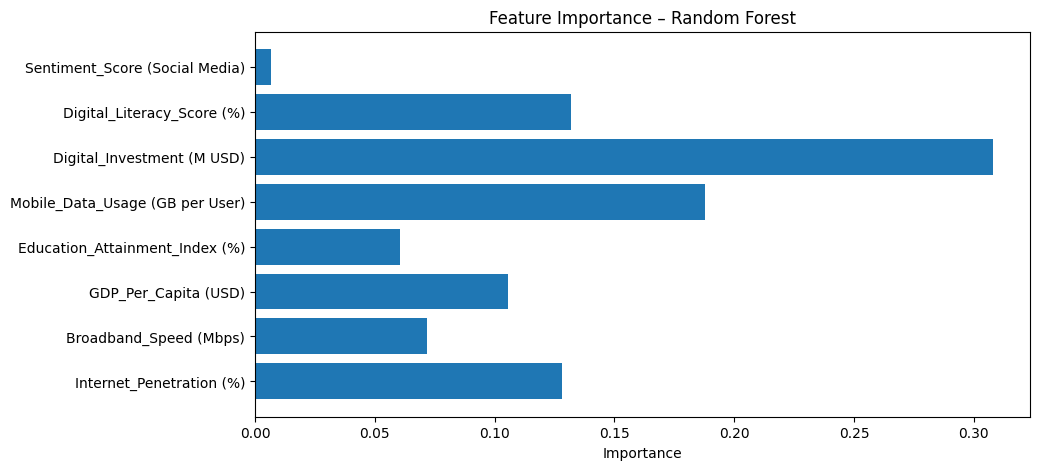

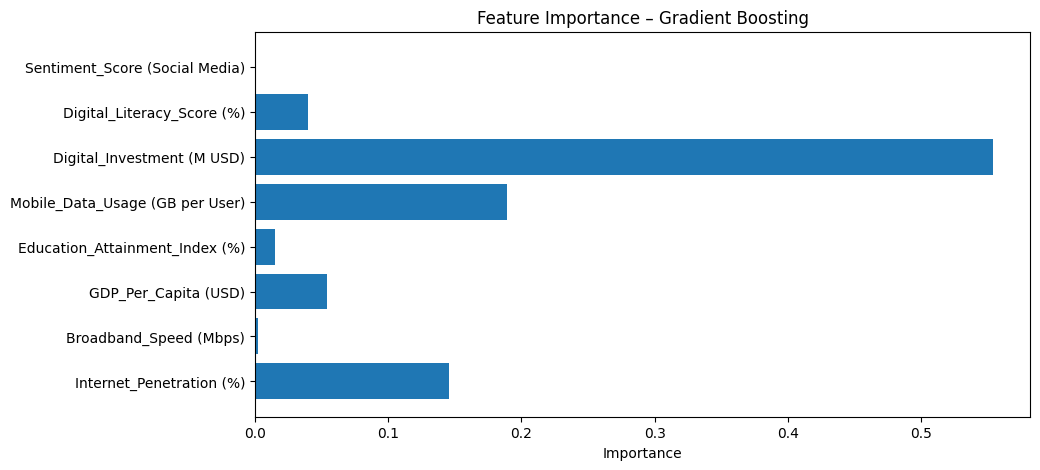

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1 – Load dataset
df = pd.read_csv("enhanced_global_internet_adoption_monthly_2015_2025.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df.dropna(inplace=True)

# Step 2 – Feature Scaling
features_to_scale = [
    'Internet_Penetration (%)',
    'Broadband_Speed (Mbps)',
    'GDP_Per_Capita (USD)',
    'Education_Attainment_Index (%)',
    'Mobile_Data_Usage (GB per User)',
    'Digital_Investment (M USD)',
    'Digital_Literacy_Score (%)',
    'Sentiment_Score (Social Media)'
]
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Step 3 – Compute Digital Readiness Score (DRS) & Target
df['DRS'] = 0.25 * df['Internet_Penetration (%)'] + \
            0.25 * df['Digital_Literacy_Score (%)'] + \
            0.25 * df['Mobile_Data_Usage (GB per User)'] + \
            0.25 * df['Digital_Investment (M USD)']
df['Digitally_Ready'] = (df['DRS'] >= 0.7).astype(int)

# Step 4 – Train/Test Split
train_df = df[df['Year'] <= 2024]
test_df  = df[df['Year'] == 2025]
X_train = train_df[features_to_scale]
y_train = train_df['Digitally_Ready']
X_test  = test_df[features_to_scale]
y_test  = test_df['Digitally_Ready']

# Step 5 – Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, max_depth=5, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Step 6 – Train, Evaluate, and Collect Feature Importance
results = []
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3)
    })

    # Store feature importance for tree-based models
    if name in ["Random Forest", "Gradient Boosting"]:
        feature_importances[name] = model.feature_importances_

# Step 7 – Display Comparison
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Results:\n")
print(results_df)

# Step 8 – Plot Feature Importance for Tree-based Models
for name, importance in feature_importances.items():
    plt.figure(figsize=(10,5))
    plt.barh(features_to_scale, importance)
    plt.title(f"Feature Importance – {name}")
    plt.xlabel("Importance")
    plt.show()
